# AURTHOR  - SHIVANSHI  TIWARI

## TSG 

## Prediction Using Supervised ML 

### Problem Statement: Predict the percentage of a student based on number of study hours

Lets Begin

#### Importing  Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Step 1: Importing Data

In [23]:
df = pd.read_csv('http://bit.ly/w-data')
print('Data imported')
df.head(15)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
df.shape # No. of rows and columns in the dataset

(25, 2)

In [43]:
df.info() # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
df.describe() # Statistical Calculations

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2 : Data Visualization

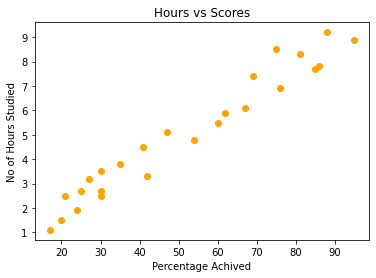

In [41]:
# Visualizing relation between "No of Hours Studied" and "Percentage Achived"

plt.scatter(x = 'Scores', y='Hours', data = df, color = 'orange')
plt.title("Hours vs Scores")
plt.xlabel("Percentage Achived")
plt.ylabel("No of Hours Studied")
plt.show()

There is a positive liner relationship between 'Hours' and 'Percentage' hence we can use Simple Linear Regression for futher perdiction.

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

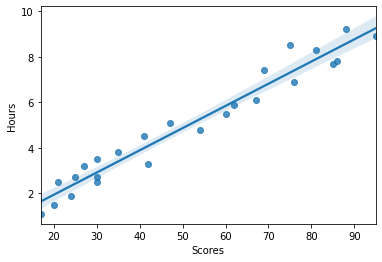

In [45]:
# Adding a Regression line through the data
sns.regplot(x = "Scores", y="Hours", data = df)

### Step 3 : Processing the data

In [49]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [50]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [51]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [52]:
# Importing libraries for Liner Regression
from sklearn.model_selection import train_test_split # for splitting data into training set & testing set
from sklearn.linear_model import LinearRegression 

### Step 4 : Training the Model

In [53]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

###### here we are splitting the dataset into 80/20 i.e., 80% of the data will be used for training the model and 20% will be used for testing the model.

In [54]:
# Simple Linear Regression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

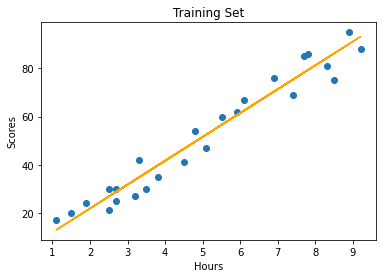

In [56]:
# plotting Regression line
reg_line = reg.coef_*X+reg.intercept_
plt.scatter(X,Y)
plt.plot(X, reg_line, color = 'orange')
plt.title("Training Set")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [57]:
Y_pred = reg.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [58]:
# Accuracy of our model on test data
print('Accuracy of the model:', reg.score(X_test, Y_test)*100)

Accuracy of the model: 94.54906892105356


### Step 5 : Comparing (Actual vs Predicted)

In [66]:
# Actual & Predicted values
df1 = pd.DataFrame({'Actual':Y_test, 'Predict':Y_pred})
df1

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [68]:
print("Training Score", reg.score(X_train, Y_train)*100)
print("Testing Score", reg.score(X_test, Y_test)*100)

Training Score 95.15510725211553
Testing Score 94.54906892105356


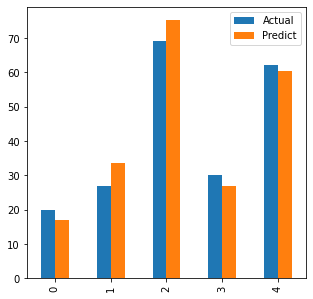

In [70]:
df1.plot(kind='bar', figsize =(5,5))
plt.show()

<AxesSubplot:ylabel='Density'>

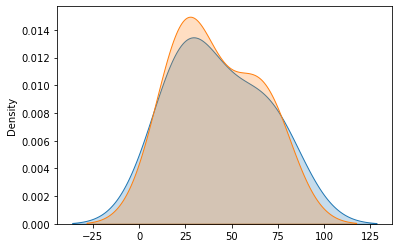

In [76]:
sns.kdeplot(Y_pred, label = 'Predicted', shade = True)
sns.kdeplot(Y_test, label = 'Actual', shade = True)

### Predict the score if a student studies 9.25 hrs

In [71]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = reg.predict(test)
print('No. of hours = {}'.format(hours))
print('Predicted Scores = {}'.format(own_pred[0]))

No. of hours = 9.25
Predicted Scores = 93.69173248737538


### Step 6 : Evaluation 

In [82]:
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))

print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred))

print("Root Mean Squared Error:",  np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

print("R-2:", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


## Conclusion : 
### If a student studies for 9.25 hrs, his/her predicted percentage score would be 93.69

## THANK YOU